# Exercise Set 15: Text Classification and Sentiment Analysis

*Morning, August 21, 2019*

In this Exercise Set you will practice using two basic text classification methods: rule- and machine learning-based. The exercise has XX parts:

1. Implement a lexical look-up method.
2. Apply pre-packaged rulebased dictionaries.
3. Train a simple baseline machine learning classifier.

In the end, you will then compare the results of these approaches.

First, load our standard stuff and import the following modules:

In [1]:
## Standard stuff:
import numpy as np, seaborn as sns, pandas as pd
## For text classification:
import nltk, nltk.sentiment, sklearn
%matplotlib inline

## Exercise 15 Part 1: Implementing your own Lexical Lookup method
There are many curated dictionaries and lexicons online for all sorts of topics (see for instance this project: https://hedonometer.org/index.html where the lexicons behind it can be downloaded here: https://github.com/andyreagan/hedonometer/blob/master/hedonometer/static/hedonometer/labMT1.txt). For this exercise we will use the following list of positive and negative words (positive:http://ptrckprry.com/course/ssd/data/negative-words.txt ; negative: http://ptrckprry.com/course/ssd/data/positive-words.txt) compilled by Hu and Liu. 

We will use the following dataset (a random sample of the trustpilot review data we collected in exercise 8) to practice on.

> **Ex. 15.1.1:**  Load it like this (remember to import the `request` package): 

```python 
# download data
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)```

The important columns are ***reviewBody*** containing the text, and the ***reviewRating_ratingValue*** containing the rating / stars.

In [2]:
# [Answer to Ex. 15.1.1]

In [3]:
### Download data as pandas dataframe
import requests
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)

> **Ex. 15.1.2:** Next, we should download and prepare the dictionaries.
1. Download the lists using python's `requests.get()`. The lists are documents of words separated by new line (which is the '\n' character). 
2. Make sure to remove the comment section in the top by splitting at the right place. 
3. `.split()` these documents into words.
4. Convert them into sets (using the `set()`-command) and assign these to two variables (e.g. ***positive*** and ***negative***). 

*Hint*: You can do all of the above in one line of code per list.

In [4]:
# [Answer to Ex. 15.1.2]

In [5]:
# Download positive and negative sentiment lexicons, split into words and convert to set representation. 
negative = set(requests.get('http://ptrckprry.com/course/ssd/data/negative-words.txt').text.split(';\n')[-1].split('\n'))
positive = set(requests.get('http://ptrckprry.com/course/ssd/data/positive-words.txt').text.split(';\n')[-1].split('\n'))
print(len(negative),len(positive))

4784 2007


Now we need to prepare the trustpilot reviews, our documents to be analyzed. This means lowercasing and tokenizing them to match the format that our dictionary comes in.

> **Ex. 15.1.3:** Define a function `preprocessing(string)`, that takes in a string and returns a list of words. The function should do the following: 
1. lowercases the string using the `.lower()` command.
2. tokenize the words using the `nltk.tokenize.TweetTokenizer()` which is good for social media type user content (i.e. emojiies and more free use of punctuation and commas. 
3. return tokenized documents.

*Hint*: You can first initialize the tokenizer (outside the preprocessing function), and then you use the `.tokenize()` method.

In [6]:
# [Answer to Ex 15.1.3]

In [7]:
# initialize tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()

# define function
def preprocessing(string):
    return tokenizer.tokenize(string.lower())

>**Ex 15.1.4:** Apply the preprocessing function to all the documents (i.e. our review texts in the column ***reviewBody***).

*Hint:* Use the `.apply()` method.

In [8]:
# [Answer to Ex 15.1.4]

In [9]:
# apply function
documents = df.reviewBody.apply(preprocessing)

Now, we need to match the words in our dictionaries to the tokenized documents.
>**Ex 15.1.5:** Define a function `count_dictionary(document,dictionary)` that takes a tokenized document and a set of words (i.e. the dictionaries we loaded in Ex 15.1.2) and counts the number of matches. The function should do the following:
1. Filter the words not in the dictionary. 
*Hint*: you can use a list comprehension or for loop and `if word in` condition. 
2. Return the length of the filtered document.			

In [10]:
# [Answer Ex 15.1.5]

In [11]:
# Define count function using a list comprehension.
def count_dictionary(tokenized_doc,dictionary):
    return len([word for word in tokenized_doc if word in dictionary])

>**Ex 15.1.6:** Define two new columns (***positive_liu***, ***negative_liu***) in the dataframe applying the count_dictionary function to all tokenized documents with the positive and negative set as input. 

*Hint:* the `.apply()` method allows you to input named arguments matching your `count_dictionary()` function to input the sentiment dictionary. 

In [12]:
# [Answer Ex 15.1.6]

In [13]:
# Use the apply function to apply our 'count_dictionary'-function to our documents. 
# The results are assigned to two new dataframe columns.

df['positive_liu'] = documents.apply(count_dictionary,dictionary=positive)
df['negative_liu'] = documents.apply(count_dictionary,dictionary=negative)

> **Ex 15.1.7 (BONUS):** Define your own set of words and use the count_dictionary function to match them (remember that they need to be lowercased to match).

In [14]:
# [Answer Ex 15.1.7]

In [15]:
# apply custom lexicon lookup. Here, we chose the words 'vegan' and 'vegetarian'.
df['custom_matching'] = documents.apply(count_dictionary,dictionary=set(['vegan','vegetarian']))

### Exercise 15 Part 2: Applying prepackaged rulebased dictionaries and comparison of results
In the following exercise you will apply two prepackaged dictionaries which are also rulebased. One is MIT's VADER method (https://github.com/cjhutto/vaderSentiment) which is builtin to the NLTK package, and the Finn Aarups (DTU) AFINN sentiment analyzer, which has the advantage of working on danish text. 


>**Ex 15.2.1:** Apply VADER: Define a four new columns using output from the VADER sentiment analyzer 
1. Import the `nltk`, `nltk.sentiment` package and download the vader_lexicon using `nltk.download('vader_lexicon')`.
2. Initialize the the vader sentiment analyzer: nltk.sentiment.vader.SentimentIntensityAnalyzer()
3. Apply the `.polarity_scores` function to all documents. This function should be provided with a string. So, you do not need to tokenize the documents, but instead you can just use the ***reviewBody*** column of your dataframe.
4. Convert the resulting Series of dictionaries (Vader outputs dictionaries of 4 scores) to a dataframe by first converting the Series into a list using the `list()` function, and then the `pd.DataFrame()` function.
5. Rename the columns adding vader_ as prefix.
6. Merge with original Dataframe. 

*Hint:* Use `pd.concat([df,df2],axis=1)` 


In [16]:
# [Answer Ex 15.2.1]

In [17]:
# import nltk.sentiment
import nltk
nltk.download('vader_lexicon')
import nltk.sentiment
# initialize the vader function
vader = nltk.sentiment.vader.SentimentIntensityAnalyzer()
# apply the function and convert to dataframe
vader_df = pd.DataFrame(list(df['reviewBody'].apply(vader.polarity_scores)))
# rename columns adding the 'vader_' prefix using a list comprehension
vader_df.columns = ['vader_'+col for col in vader_df.columns]
# merge with original dataframe
df = pd.concat([df,vader_df],axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tdb973\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


>**Ex 15.2.2:** Install the AFINN package: `pip install afinn`. Read how to apply the afinn package here (https://github.com/fnielsen/afinn) and define a column called afinn. 

*Hint:* As VADER's `polarity_score`, AFINN should be provided with a string and not the tokenized documents.

In [18]:
# [Answer Ex 15.2.2]

In [19]:
from afinn import Afinn
afinn = Afinn()
df['afinn'] = df.reviewBody.apply(afinn.score)


>**Ex 15.2.3:** Plot all the different dictionary and rulebased sentiment analysis columns against each other using the seaborn plotting function `sns.pairplot`. Set the color (i.e. hue argument as the number of stars in the `reviewRating_ratingValue` column). 

*Hint:* To plot, work with a smaller dataframe. You shoul select only the relevant columns, i.e. the ones with the sentiment analysis results and the star rating column. Moreover, you can downsample the dataframe to 1000 rows using the `.sample()` method.


In [20]:
# [Answer Ex 15.2.3]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


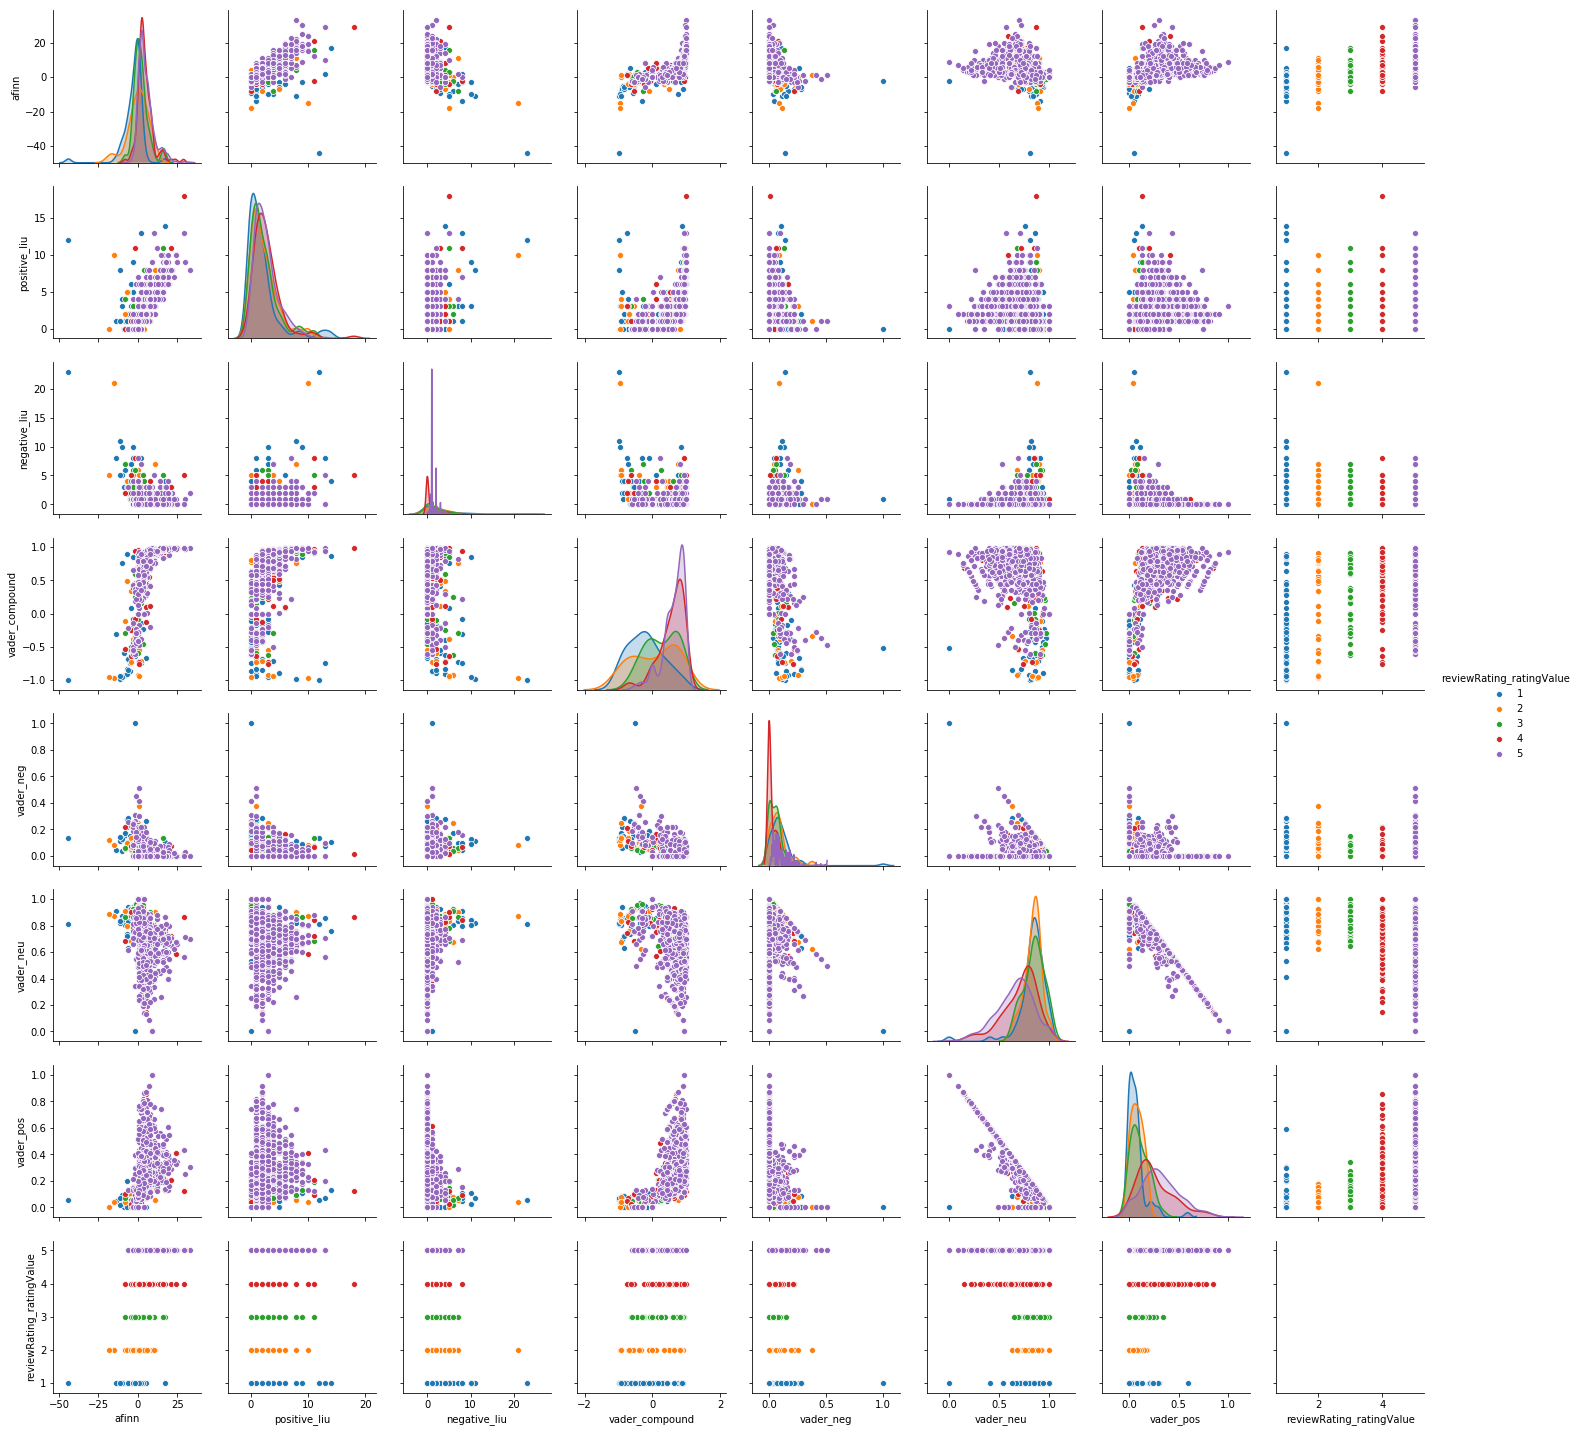

In [21]:
# define columns
sentiment_columns = ['afinn','positive_liu','negative_liu']+[col for col in df.columns if 'vader_' in col]
hue = 'reviewRating_ratingValue'
sns.pairplot(df.sample(1000)[sentiment_columns+[hue]],hue=hue)

>**Ex 15.2.4:** Inspect a document where the LIU and VADER dictionaries disagree. More specifically, look at documents where the LIU lexicon is positive and the VADER is negative. For that, you should filter on positive expressions by LIU, and sample in the most negative according to the VADER. Try to explain the disagreement in terms of simple matches versus negations. 

*Hint*: Pick a document and see which words the LIU lexicon has matched using python set notation: e.g. 

```python 
# overlap between two sets
set(documents[0])&positive
```

In [22]:
# [Answer Ex 15.2.4]

In [38]:
# Pick documents with positive LIU classification
positive_liu_reviews = df[((df.positive_liu-df.negative_liu)>0)]

# We, now, want to get the indeces of these documents and the words within them LUI classified as positive:
for idx in df.iloc[df[((df.positive_liu-df.negative_liu)>0)].vader_compound.sort_values().index].head().index:
    print(idx,set(documents[idx])&positive)

# So that, in a final step, we can pick one and look at the whole text to assess why LUI and VADER disagree:
print(df.reviewBody[9835])

#LIU defines 'well' as a positive word. However, 'well' is in the context of 'not' well.  
print(vader.polarity_scores('the videos are not well organized'))

# LIU defines 'work' as a positive word. However, here it is in the context of 'hard work'
print(vader.polarity_scores('find it hard to work through'))

## The VADER understands these negations.                             

7682 {'correctly', 'right', 'refund', 'correct', 'cheaper'}
638 {'refund'}
7492 {'good', 'like'}
9835 {'motivated', 'well', 'helpful', 'work', 'clear'}
8974 {'like', 'super', 'excitement', 'refund', 'better', 'wonder'}
This is a preliminary review as I am still in the Medical Billing Specialist program, but the videos are not well organized, the slides have typos and the pictures in slides aren't clear to see and often not relative. The woman in the videos is so redundant, often saying the same thing three different ways in a matter of minutes. The videos make mention of terminology that is never spelled or is not even a vocabulary word, which I find ridiculous.  This is an anatomy class and if you are going to talk about it don't assume the learner knows anything about what it is that you are saying. The book is not helpful at all. At the end of the chapter there are vocabulary words and next to them pages where the word was discussed. Well when you go to that page you simply find the

## Exercise 15 Part 3: Train a classifier to score the reviews and compare results
In following exercise you will implement a simple text classifier based on the logistic regression trained on the ratings. We will walk through the standard procedures of Supervised Learning - i.e. parameter search and crossvalidation - but first we need to transform our documents into feature vectors. Here, we will use the sklearn function `sklearn.feature_extraction.text.CountVectorizer`. This module will transform the documents into BoWs (bag of words), using words counts and combinations of words (i.e. ngram) as columns.

> **Ex 15.3.1:** Make a train-test (50-50) split before applying any transformation to avoid *data leakage* and to set up a clean hyperparameter search using the train set, and saving the test set for crossvalidation. 

*Hint:* Use `sklearn.model_selection.train_test_split`.


In [24]:
#[Answer Ex 15.3.1]

In [25]:
# Splitting the dataframe into train and test data.
import sklearn
train,test = sklearn.model_selection.train_test_split(df,test_size=0.5)

> **Ex 15.3.2:** Preproce the documents as in Ex 15.1.3. Then, initialize the `sklearn.feature_extraction.text.CountVectorizer`. 
The countvectorizer has many possible inputs: The important ones here are the tokenization function (use the one defined above, i.e. `tokenizer=tokenizer.tokenize`) and `ngram_range=(1,2)`. Finally, run the `.fit()` function with the train documents as input.

In [26]:
#[Answer Ex 15.3.2]

In [27]:
# Apply tokenizer defined above within the CountVectorizer() to set up our count-vectorizer:
vectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer=tokenizer.tokenize,ngram_range=(1,2))

# Fit the count vectorizer to the reviews.
vectorizer.fit(train.reviewBody)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x000002056C6C8080>>,
        vocabulary=None)

> **Ex 15.3.3:** Transform train and test documents to a sparse vector using the `transform` command on both the test and the train documents. Assign these to two variables, e.g. `X_train` and `X_test`. Afterwards, inspect the resulting dimensions of each input vector using the `.shape` function.

In [28]:
#[Answer Ex 15.3.3]

In [29]:
# Create out X_train, X_test
X_train = vectorizer.transform(train.reviewBody)
X_test = vectorizer.transform(train.reviewBody)

# Check whether they have the same shape (remember we did a 50-50 split).
print('X_train has shape:', X_train.shape)
print('X_test has shape:', X_test.shape)

X_train has shape: (5000, 86623)
X_test has shape: (5000, 86623)


> **Ex 15.3.4:** Convert ratings to binary outcome. Here we make a decision to count ratings as positive if above 3 and otherwise negative. Define ***y_train*** and ***y_test*** as a binary variables expressing whether it is higher than 3 or not.

In [30]:
#[Answer Ex 15.3.4]

In [31]:
# Create our target variables
y_train = (train.reviewRating_ratingValue>3)*1.0
y_test = (test.reviewRating_ratingValue>3)*1.0

Now we are ready to train our model. We will use the penalized logistic regression which is widely used for training baseline in within natural language processing (NLP) - especially with a little twist see [Wang and Manning 2012](https://www.aclweb.org/anthology/P12-2018). 
As always we should we remember to do our parameter search using the training data only.

> **Ex 15.3.5:** In this case we will do only a search over the penalizationterm C and, therefore, we can use the `sklearn.linear_model.LogisticRegressionCV()` which handles kfold-based parameter search directly. The function takes as arguments the range of values to be searched and the number of folds used for cross-validation.

*Hint:* You can use a `LogisticRegressionCV()` with the arguments `Cs=np.linspace(0.1,2,10)`,`cv=10` and `verbose=2`. You can vary these arguments if you want.

In [32]:
# [Answer Ex 15.3.5]

In [33]:
# Import LogisticRegressionCV from sklear.linear_model
from sklearn.linear_model import LogisticRegressionCV

# Set up the LogisticRegressionCV
clf = LogisticRegressionCV(Cs=np.linspace(0.1,2,10),cv=10,verbose=2)

# Fit it to the training data
clf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished


LogisticRegressionCV(Cs=array([0.1    , 0.31111, 0.52222, 0.73333, 0.94444, 1.15556, 1.36667,
       1.57778, 1.78889, 2.     ]),
           class_weight=None, cv=10, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.0001, verbose=2)

> **Ex 15.3.6:** Report the performance of the classifier. You should report the accuracy. Additionally, you might want to report precision, recall, f1, AUC and roc-auc-curve.

*Hint:* These measures can be computed using the `sklearn.metrics` package. You might want to define a function that takes your classifier and data as input and returns the metrics.

In [ ]:
# [Answer Ex 15.3.6]

In [34]:
# Define a function to compute accuracy, precision, recall, f1, auc and roc-auc-curve:
def report_performance(clf,X_test,y_test,thres=0.5):
    y_prob = clf.predict_proba(X_test)[:,1]
    y_pred = (y_prob>thres)*1.0
    acc = sklearn.metrics.accuracy_score(y_test,y_pred)
    precision = sklearn.metrics.precision_score(y_test,y_pred)
    recall = sklearn.metrics.recall_score(y_test,y_pred)
    f1 = sklearn.metrics.f1_score(y_test,y_pred)
    auc = sklearn.metrics.roc_auc_score(y_test,y_prob)
    return pd.DataFrame([{'auc':auc,'f1':f1,'recall':recall,'precision':precision,'accuracy':acc}])

# Apply it to the test data
report_performance(clf,X_test,y_test)

,accuracy,auc,f1,precision,recall
0,0.7586,0.484625,0.860414,0.86131,0.859519


> **Ex 15.3.7:** Create a column in the dataframe applying the classifier to all documents.
1. First transform documents using vectorizer from before. 
2. Get the predicted probability of a positive review: `clf.predict_proba(X)`. Note that you only need the second column - it predicts probabilities for both classes 0 and 1.

In [35]:
# [Answer Ex 15.3.7]

In [36]:
# Transforming all the documents
X = vectorizer.transform(df.reviewBody)

# Get the predicted probability of a positive review
df['ml_positive'] = clf.predict_proba(X)[:,1]

>**Ex 15.3.8 (BONUS):** Compute the correlation of the computed sentiment with the given rating for all three methods. Would you expect a positive or a negative correlation? Note that there are different categories describing the ratings' subjects (see the ***categories*** column). You can compute the correlation averaging the ratings and the sentiment scores over these categories.

In [ ]:
# [Answer Ex 15.3.8 (BONUS)]

In [37]:
# Note that some ratings cover several categories, this is ignored here and only the rating of each combination of categories
# is correlated with the respectives sentiments from VADER, LIU and the machine learning classifier.

liu_cat = df.groupby('categories').positive_liu.mean().sort_values()
vader_cat = df.groupby('categories').vader_pos.mean()
ml_cat = df.groupby('categories').ml_positive.mean()
review_cat = df.groupby('categories').reviewRating_ratingValue.mean()

# Compute the correlations of each sentiment analysis method with the avg rating per category.

# There is a strong positive correlation for our logistic regression classifier, a weak positive correlation for VADER and a 
# very small negative correlation for LIU.

np.corrcoef(review_cat.values,vader_cat.values)[0][1],np.corrcoef(review_cat.values,liu_cat.values)[0][1],np.corrcoef(review_cat.values,ml_cat.values)[0][1]

(0.4892479159216027, -0.031249920511527356, 0.8184758346778221)